In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Transaction data: cleaning and feature engineering

In [2]:
transaction = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='Transactions',skiprows=1)
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [4]:
# Check null values  
transaction[transaction['brand'].isnull()][['brand','product_line','product_class','product_size','standard_cost','product_first_sold_date']]

,brand,product_line,product_class,product_size,standard_cost,product_first_sold_date
136,NaN,NaN,NaN,NaN,NaN,NaN
159,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN
406,NaN,NaN,NaN,NaN,NaN,NaN
676,NaN,NaN,NaN,NaN,NaN,NaN
780,NaN,NaN,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN
1130,NaN,NaN,NaN,NaN,NaN,NaN
1196,NaN,NaN,NaN,NaN,NaN,NaN
1282,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Drop those with many missing values as its hard to fill nan values
transaction_dropna = transaction.dropna(how='any',axis=0)

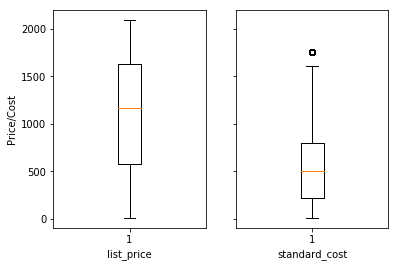

In [6]:
# Check outliers
fig,ax = plt.subplots(1,2,sharey=True)
ax[0].boxplot(transaction_dropna['list_price'])
ax[0].set_xlabel('list_price')
ax[0].set_ylabel('Price/Cost')
ax[1].boxplot(transaction_dropna['standard_cost'])
ax[1].set_xlabel('standard_cost')
plt.show()

In [7]:
# Divide into 2 dataset for further analyse
transaction_approved = transaction_dropna[transaction_dropna['order_status'] == 'Approved']
transaction_declined = transaction_dropna[transaction_dropna['order_status'] != 'Approved']

In [8]:
# Frequency (F) in RFM model
# No. of purchase
purchase_approved_count = transaction_approved.groupby('customer_id')['transaction_id'].count()
purchase_approved_count.name = 'purchase_approved_count'
purchase_declined_count = transaction_declined.groupby('customer_id')['transaction_id'].count()
purchase_declined_count.name = 'purchase_declined_count'

In [9]:
# Recency (R) in RFM model
# Date of Recent purchase
recent_purchase_date = transaction_approved.groupby('customer_id')['transaction_date'].max()
least_recency = pd.Timestamp('2018-01-01 00:00:00') - recent_purchase_date
least_recency = least_recency.apply(lambda x:x.days)
least_recency.name = 'least_recency'

In [10]:
# Monetary Value(M) in RFM model
# Total Value(price&cost) of approved orders
price_sum = transaction_approved.groupby('customer_id')['list_price'].sum()
price_sum.name = 'price_sum'
cost_sum = transaction_approved.groupby('customer_id')['standard_cost'].count()
cost_sum.name = 'cost_sum'

In [11]:
# percentage of online order
online_order_percentage = transaction_approved.groupby('customer_id')['online_order'].sum()/purchase_approved_count
online_order_percentage.name = 'online_order_percentage'

Demograpic data: cleaning

In [12]:
demographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic',skiprows=1)
demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [13]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.3+ KB


In [14]:
demographic_clean = demographic.copy()

In [15]:
demographic_clean.drop(columns='default',inplace=True)

In [16]:
# Fill missing test values
demographic_clean[['last_name','job_title','job_industry_category']] = demographic_clean[['last_name','job_title','job_industry_category']].fillna('Unknown')

In [17]:
# Use mean to fill nan tenuew
# Could be more precise
demographic_clean.tenure.fillna(demographic_clean.tenure.mean(),inplace=True)

In [18]:
demographic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              4000 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              4000 non-null object
job_industry_category                  4000 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
owns_car                               4000 non-null object
tenure                                 4000 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 375.1+ KB


In [19]:
# Extract year,month and day from DOB
demographic_clean['DOB_year'] = demographic_clean['DOB'].apply(lambda x:x.year)
demographic_clean['DOB_month'] = demographic_clean['DOB'].apply(lambda x:x.month)
demographic_clean['DOB_day'] = demographic_clean['DOB'].apply(lambda x:x.day)

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


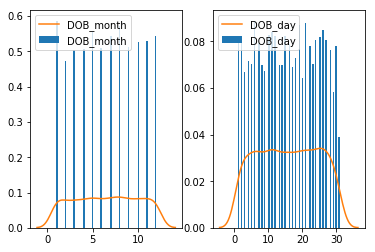

In [20]:
fig,ax = plt.subplots(1,2)
ax[0].hist(demographic_clean.DOB_month,bins=70,density=True)
sns.kdeplot(demographic_clean.DOB_month,ax=ax[0])
ax[1].hist(demographic_clean.DOB_day,bins=70,density=True)
sns.kdeplot(demographic_clean.DOB_day,ax=ax[1])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x23b73bdce10>,
 'caps': [<matplotlib.lines.Line2D at 0x23b73be04a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23b73bdca58>],
 'medians': [<matplotlib.lines.Line2D at 0x23b73be0b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x23b73be0e80>],
 'means': []}

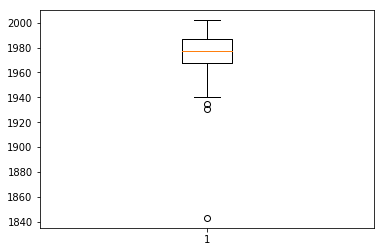

In [21]:
# Check outliers in year
plt.boxplot(demographic_clean.DOB_year.dropna())

In [22]:
# Clean outliers
demographic_clean = demographic_clean[demographic_clean['DOB_year']>1900]

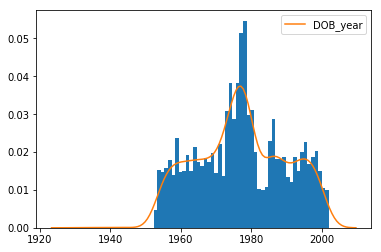

In [23]:
# Check the distribution of year 
plt.hist(demographic_clean.DOB_year,bins=70,density=True)
sns.kdeplot(demographic_clean.DOB_year)

In [24]:
demographic_clean['DOB_year'].fillna(demographic_clean['DOB_year'].median(),inplace=True) # Fill missing years
demographic_clean['age'] = 2018 - demographic_clean['DOB_year'] # Calculate age
demographic_clean['age_cut'],age_cut_boundary = pd.qcut(demographic_clean.age,5,labels=[1,2,3,4,5], retbins=True) # Divide into 5 grops based on quantile

In [25]:
age_cut_boundary

array([16., 29., 39., 44., 53., 87.])

In [26]:
# Check gender data
demographic_clean.gender.unique()

array(['F', 'Male', 'Female', 'Femal', 'M'], dtype=object)

In [27]:
def gender_clean(gender):
    if 'F' in gender: return 'Female'
    else: return 'Male'

demographic_clean.gender = demographic_clean.gender.apply(gender_clean)

{'whiskers': [<matplotlib.lines.Line2D at 0x23b73a6ee48>,
 'caps': [<matplotlib.lines.Line2D at 0x23b73a72a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x23b73a6ec88>],
 'medians': [<matplotlib.lines.Line2D at 0x23b73a72e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x23b73a74588>],
 'means': []}

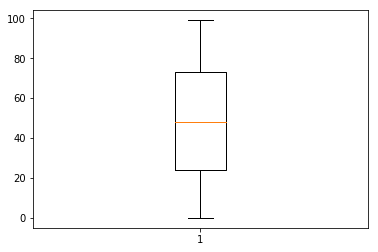

In [28]:
plt.boxplot(demographic_clean['past_3_years_bike_related_purchases'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23b73a9a978>,
 'caps': [<matplotlib.lines.Line2D at 0x23b73a9ae48>,
 'boxes': [<matplotlib.lines.Line2D at 0x23b73a9a470>],
 'medians': [<matplotlib.lines.Line2D at 0x23b73a9c908>],
 'fliers': [<matplotlib.lines.Line2D at 0x23b73a9cd30>],
 'means': []}

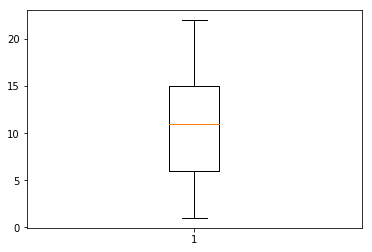

In [29]:
plt.boxplot(demographic_clean['tenure'])

'job_title' and 'job_industry_category' can be detailed cleaned
e.g. Using NLP to calculate the similarity between each record and combine similiar records, such as 'Programmer III' and 'Programmer II'

Address data :cleaning

In [30]:
address = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerAddress',skiprows=1)
address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [31]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
customer_id           3999 non-null int64
address               3999 non-null object
postcode              3999 non-null int64
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null int64
dtypes: int64(3), object(3)
memory usage: 187.5+ KB


In [32]:
# Check state data
address.state.unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [33]:
def state_clean(state):
    if 'V' in state: return 'VIC'
    elif 'N' in state: return 'NSW'
    else: return 'QLD'

address.state = address.state.apply(state_clean)

Could consider more economic factors based on the location

Combine all training data

In [34]:
train = demographic_clean.copy()
train = train.merge(purchase_approved_count, left_on='customer_id',right_index=True,how='left')
train = train.merge(purchase_declined_count, left_on='customer_id',right_index=True,how='left')
train = train.merge(least_recency, left_on='customer_id',right_index=True,how='left')
train = train.merge(price_sum, left_on='customer_id',right_index=True,how='left')
train = train.merge(cost_sum, left_on='customer_id',right_index=True,how='left')
train = train.merge(online_order_percentage, left_on='customer_id',right_index=True,how='left')
train = train.merge(address['state'], left_on='customer_id',right_index=True,how='left')
train = train.merge(address['property_valuation'], left_on='customer_id',right_index=True,how='left')

In [35]:
train

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,age,age_cut,purchase_approved_count,purchase_declined_count,least_recency,price_sum,cost_sum,online_order_percentage,state,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,65.0,5,11.0,NaN,9.0,9084.45,11.0,0.545455,NSW,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,38.0,2,3.0,NaN,130.0,4149.07,3.0,0.333333,QLD,9.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,...,64.0,5,7.0,NaN,104.0,9525.22,7.0,0.142857,NSW,4.0
3,4,Talbot,Unknown,Male,33,1961-10-03,Unknown,IT,Mass Customer,N,...,57.0,5,2.0,NaN,197.0,1047.72,2.0,0.500000,VIC,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Unknown,Affluent Customer,N,...,41.0,3,6.0,NaN,18.0,5903.20,6.0,0.333333,NSW,9.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,Unknown,Retail,High Net Worth,N,...,52.0,4,5.0,NaN,66.0,5931.69,5.0,0.400000,NSW,4.0
6,7,Fina,Merali,Female,6,1976-02-23,Unknown,Financial Services,Affluent Customer,N,...,42.0,3,3.0,NaN,255.0,995.38,3.0,0.666667,NSW,12.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,Unknown,Mass Customer,N,...,56.0,5,9.0,NaN,24.0,9933.29,9.0,0.555556,VIC,8.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,...,45.0,4,6.0,NaN,80.0,5357.55,6.0,0.166667,QLD,4.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,...,30.0,2,5.0,NaN,45.0,5003.75,5.0,0.400000,VIC,6.0


In [36]:
for column in train.columns:
    if type(train[column][0]) == str:
        train[column].fillna('Unknown',inplace=True)
    elif sum(train[column].isnull()) != 0: train[column].fillna(0,inplace=True)

In [37]:
train.drop(columns=['first_name','last_name','customer_id','DOB', 'DOB_year', 'DOB_month', 'DOB_day', 'age'], inplace = True)

Process test data

In [38]:
test = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList', skiprows=1)
test = test.drop(columns = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Rank', 'Value'])

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country                                1000 non-null 

In [40]:
test_clean = test.copy()

In [41]:
test_clean[['last_name','job_title','job_industry_category']] = test_clean[['last_name','job_title','job_industry_category']].fillna('Unknown')

In [42]:
test_clean.gender.unique()

array(['Male', 'Female', 'U'], dtype=object)

In [43]:
gender_fill = demographic_clean.groupby(['job_title','gender'])['DOB'].count().unstack().apply(lambda x: 'Female' if x[0] > x[1] else 'Male', axis=1).to_dict()
gender_fill

{'Account Coordinator': 'Female',
 'Account Executive': 'Female',
 'Account Representative I': 'Female',
 'Account Representative II': 'Male',
 'Account Representative III': 'Female',
 'Account Representative IV': 'Male',
 'Accountant I': 'Male',
 'Accountant II': 'Female',
 'Accountant III': 'Male',
 'Accountant IV': 'Male',
 'Accounting Assistant I': 'Female',
 'Accounting Assistant II': 'Male',
 'Accounting Assistant III': 'Male',
 'Accounting Assistant IV': 'Female',
 'Actuary': 'Male',
 'Administrative Assistant I': 'Female',
 'Administrative Assistant II': 'Female',
 'Administrative Assistant III': 'Male',
 'Administrative Assistant IV': 'Female',
 'Administrative Officer': 'Male',
 'Analog Circuit Design manager': 'Male',
 'Analyst Programmer': 'Female',
 'Assistant Manager': 'Female',
 'Assistant Media Planner': 'Female',
 'Assistant Professor': 'Female',
 'Associate Professor': 'Male',
 'Automation Specialist I': 'Female',
 'Automation Specialist II': 'Female',
 'Automation Sp

In [44]:
test_clean.loc[test_clean['gender'] == 'U','gender'] = test_clean[test_clean['gender'] == 'U']['job_title'].map(gender_fill)

{'whiskers': [<matplotlib.lines.Line2D at 0x23b73ab12b0>,
 'caps': [<matplotlib.lines.Line2D at 0x23b73a25208>,
 'boxes': [<matplotlib.lines.Line2D at 0x23b73ab18d0>],
 'medians': [<matplotlib.lines.Line2D at 0x23b712106a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23b71210358>],
 'means': []}

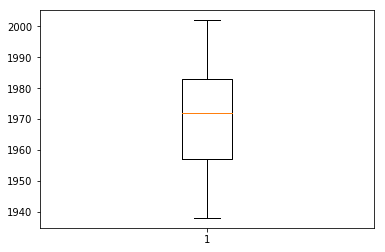

In [45]:
test_clean['DOB_year'] = test_clean['DOB'].apply(lambda x:x.year)
plt.boxplot(test_clean.DOB_year.dropna())

In [46]:
test_clean['DOB_year'].fillna(test_clean['DOB_year'].median(),inplace=True)
test_clean['age'] = 2018 - test_clean['DOB_year']
test_clean['age_cut'] = pd.cut(test_clean['age'],age_cut_boundary,labels=[1,2,3,4,5])

In [47]:
test_clean.drop(columns=['first_name','last_name','country','DOB','address','postcode', 'DOB_year', 'age'],inplace = True)

In [48]:
customer_attributes = test_clean.columns
transaction_features = train.columns.difference(customer_attributes)

In [49]:
text_features = []
for x in customer_attributes:
    if type(train[x][0]) == str:
        text_features.append(x)

        
text_features

['gender',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'state']

In [50]:
train[text_features]

,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,state
0,Female,Executive Secretary,Health,Mass Customer,N,Yes,NSW
1,Male,Administrative Officer,Financial Services,Mass Customer,N,Yes,QLD
2,Male,Recruiting Manager,Property,Mass Customer,N,Yes,NSW
3,Male,Unknown,IT,Mass Customer,N,No,VIC
4,Female,Senior Editor,Unknown,Affluent Customer,N,Yes,NSW
5,Male,Unknown,Retail,High Net Worth,N,Yes,NSW
6,Female,Unknown,Financial Services,Affluent Customer,N,Yes,NSW
7,Male,Media Manager I,Unknown,Mass Customer,N,No,VIC
8,Female,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,QLD
9,Female,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,VIC


In [51]:
dict_list = []
from sklearn.preprocessing import LabelEncoder
for feature in text_features:
    encoder = LabelEncoder().fit(train[feature])
    dict_list.append(dict(zip(encoder.classes_,encoder.transform(encoder.classes_))))
    train[feature] = encoder.transform(train[feature])
    test_clean[feature] = encoder.transform(test_clean[feature])

In [52]:
dict_list

[{'Female': 0, 'Male': 1},
 {'Account Coordinator': 0,
  'Account Executive': 1,
  'Account Representative I': 2,
  'Account Representative II': 3,
  'Account Representative III': 4,
  'Account Representative IV': 5,
  'Accountant I': 6,
  'Accountant II': 7,
  'Accountant III': 8,
  'Accountant IV': 9,
  'Accounting Assistant I': 10,
  'Accounting Assistant II': 11,
  'Accounting Assistant III': 12,
  'Accounting Assistant IV': 13,
  'Actuary': 14,
  'Administrative Assistant I': 15,
  'Administrative Assistant II': 16,
  'Administrative Assistant III': 17,
  'Administrative Assistant IV': 18,
  'Administrative Officer': 19,
  'Analog Circuit Design manager': 20,
  'Analyst Programmer': 21,
  'Assistant Manager': 22,
  'Assistant Media Planner': 23,
  'Assistant Professor': 24,
  'Associate Professor': 25,
  'Automation Specialist I': 26,
  'Automation Specialist II': 27,
  'Automation Specialist III': 28,
  'Automation Specialist IV': 29,
  'Biostatistician I': 30,
  'Biostatistician

In [53]:
continuous_featuers = customer_attributes.difference(text_features)
continuous_featuers = continuous_featuers.drop('age_cut')

In [54]:
from sklearn.preprocessing import StandardScaler
for feature in continuous_featuers:
    scaler = StandardScaler().fit(np.array(train[feature]).reshape(-1, 1))
    train[feature] = scaler.transform(np.array(train[feature]).reshape(-1, 1))
    test_clean[feature] = scaler.transform(np.array(test_clean[feature]).reshape(-1, 1))
    print(feature, scaler.mean_, scaler.var_)
    
train[transaction_features] = StandardScaler().fit_transform(train[transaction_features])

past_3_years_bike_related_purchases [49.03936605] [827.39926831]
property_valuation [7.5140593] [7.99111113]
tenure [10.65465235] [32.01493746]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was

Model 1: identify high value customers through transaction data

In [55]:
transaction_features

Index(['cost_sum', 'least_recency', 'online_order_percentage', 'price_sum',
       'purchase_approved_count', 'purchase_declined_count'],
      dtype='object')

In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(train[transaction_features])

In [66]:
kmeans.cluster_centers_

array([[ 0.65808777, -0.11178877,  0.30296178,  0.63162949,  0.65808777,
         0.05018506],
       [-0.93796887,  0.15933191, -0.43180975, -0.90025803, -0.93796887,
        -0.07152849]])

In [67]:
train['high_value'] = kmeans.labels_

In [68]:
if kmeans.cluster_centers_[0][0] > kmeans.cluster_centers_[1][0]: train['high_value'] = 1 - train['high_value']

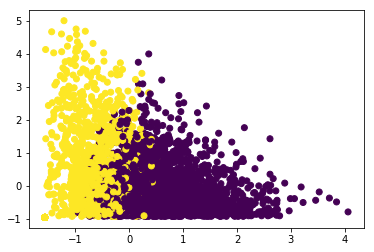

In [69]:
plt.scatter(train['price_sum'],train['least_recency'],c=kmeans.labels_)

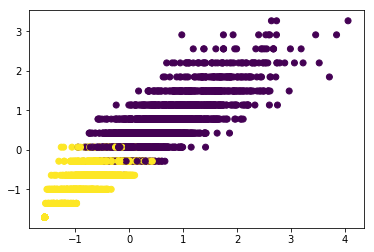

In [70]:
plt.scatter(train['price_sum'],train['purchase_approved_count'],c=kmeans.labels_)

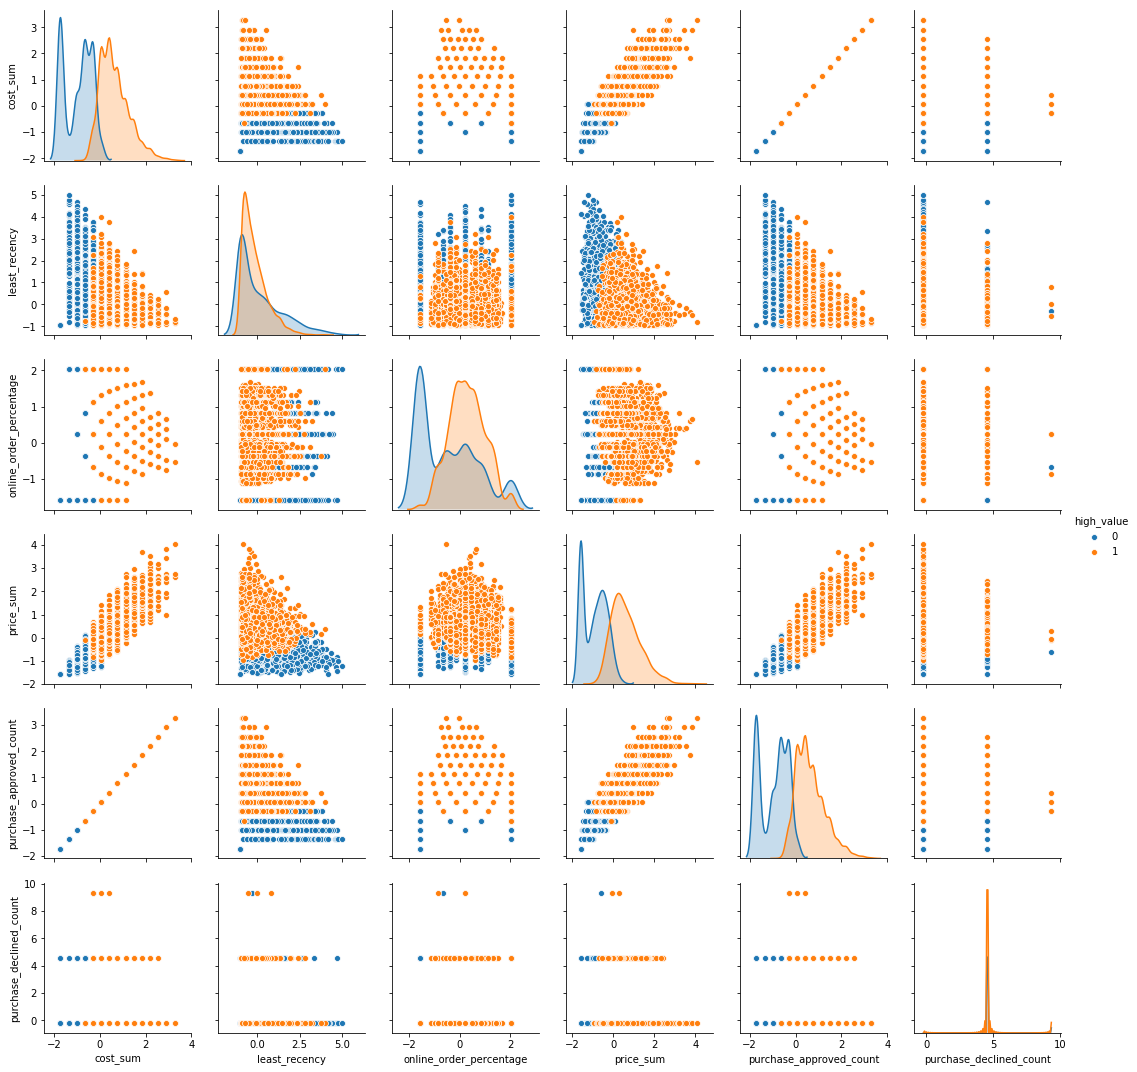

In [71]:
sns.pairplot(train,vars=transaction_features,hue='high_value')